<a href="https://colab.research.google.com/github/Vansh-Giri/ML-Projects/blob/main/weather4cast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
B = pd.read_csv("train.csv")
print(B.to_string())

            Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow
0       2/1/2008     19.5     22.4      15.6          6.2       0.0           W             41          S        SSW            17            20           92           84       1017.6     1017.400         8         8     20.7     20.9       Yes          Yes
1       2/2/2008     19.5     25.6       6.0          3.4       2.7           W             41          W          E             9            13           83           73       1017.9     1016.400         7         7     22.4     24.8       Yes          Yes
2       2/3/2008     21.6     24.5       6.6          2.4       0.1           W             41        ESE        ESE            17             2           88           86       1016.7     1015.600         7         8     23.5 

In [ ]:
cat_att = ["WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"]


In [ ]:
cat_adj = pd.get_dummies(B,columns=cat_att)
cat_att = cat_adj.drop(columns=["Date"])

In [ ]:
cat_adj

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,True,False,False,False,False,False,True,False,True
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,True,False,True
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,True,False,True
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,True,False,True
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,37,22,20,73,...,True,False,False,False,False,False,True,False,True,False
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,30,20,7,78,...,False,False,False,False,False,False,True,False,True,False
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,24,15,13,85,...,False,False,False,False,False,False,True,False,True,False
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,43,17,19,56,...,False,False,False,True,False,False,True,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler
D = StandardScaler()
F = D.fit_transform(cat_att)

In [ ]:
X = cat_att.drop(columns = ["RainTomorrow_No","RainTomorrow_Yes"])
Y = cat_att["RainTomorrow_Yes"]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
H = {"n_estimators":[200,100,50,300], "max_depth":[3,4,5,10,20]}
grid = GridSearchCV(RFC,H,cv=10)
grid.fit(X_train,Y_train)
J = RFE(grid.best_estimator_, n_features_to_select= 10)
J.fit(X_train,Y_train)
Y_pred = J.predict(X_test)


In [ ]:
Y_pred


array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

       False       0.85      0.94      0.89       731
        True       0.74      0.52      0.61       251

    accuracy                           0.83       982
   macro avg       0.80      0.73      0.75       982
weighted avg       0.82      0.83      0.82       982

[[686  45]
 [121 130]]
0.8309572301425662


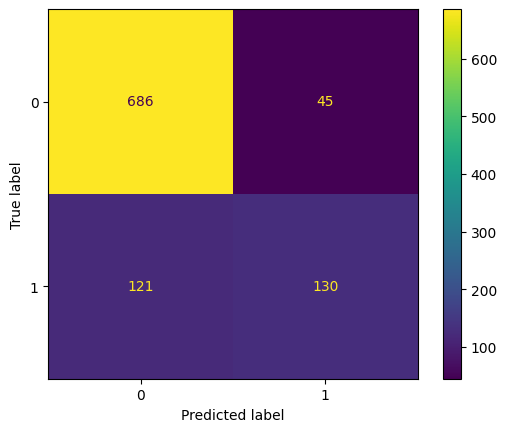

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
T = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=T)
disp.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


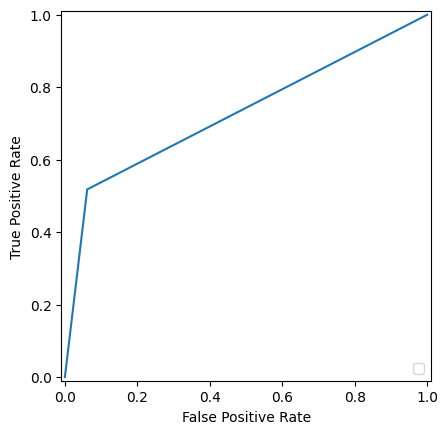

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve
fpr,tpr,_=roc_curve(Y_test,Y_pred)
roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr)
roc_display.plot()
plt.show()
